## Linear Models for Classification
### Code samples on Scikit-Learn: Logistic Regression and Linear SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

cancer = load_breast_cancer()
X, y = scale(cancer.data), cancer.target
X.shape

(569, 30)

In [3]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### Use only two features to build the model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train[:, :2], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

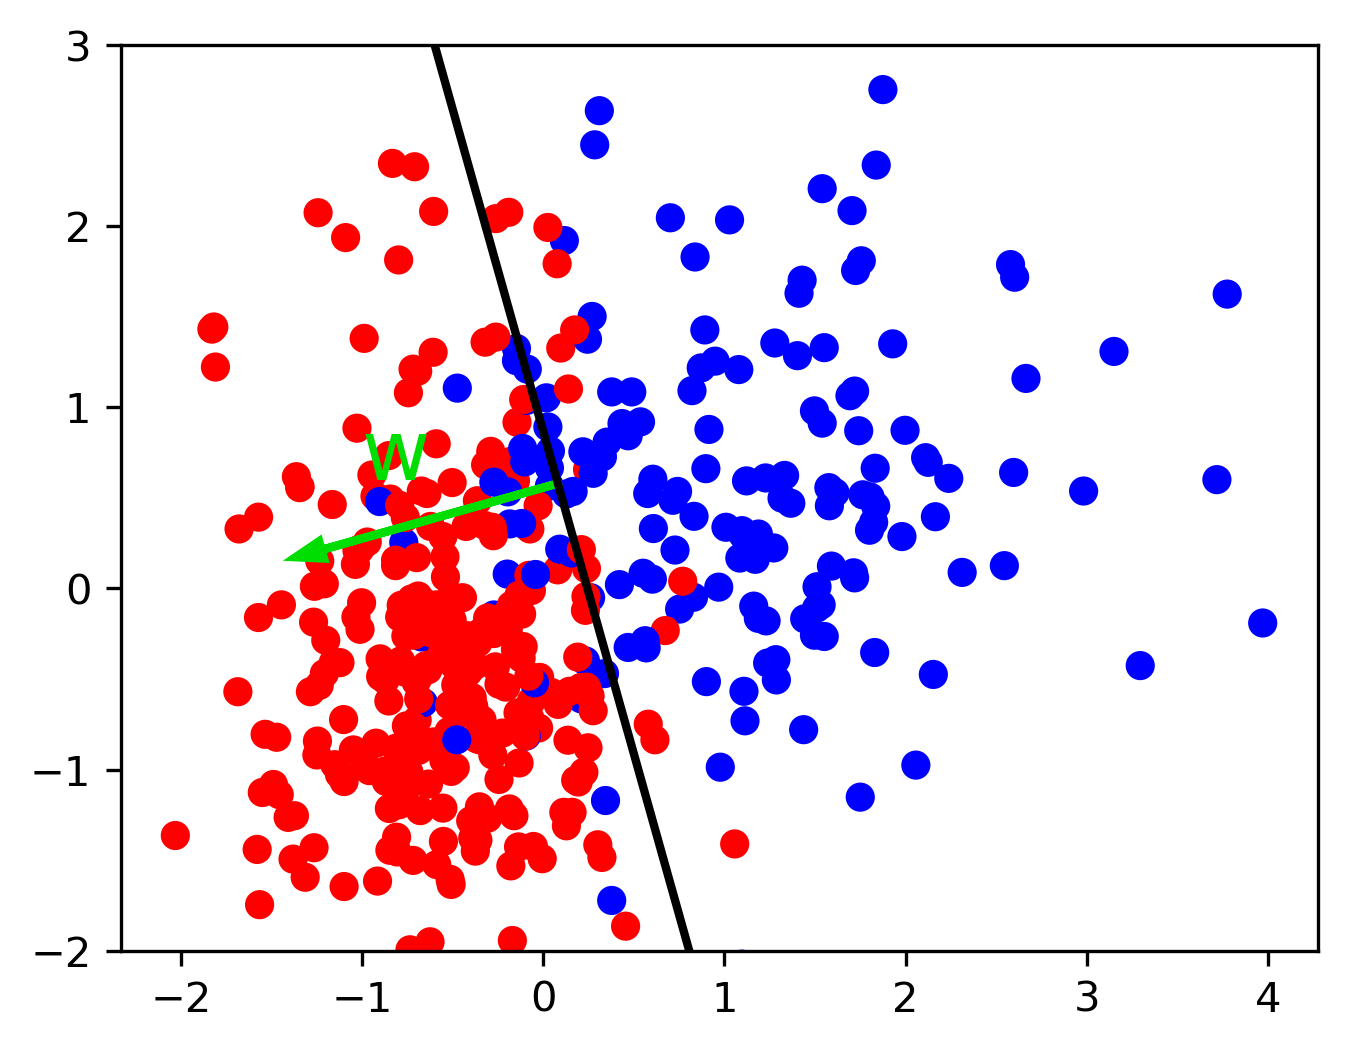

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr")
coef = logreg.coef_.ravel()
line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
line2 = - (line * coef[1]  + logreg.intercept_) / coef[0]
plt.plot(line2, line, c='k', linewidth=2)
plt.arrow(line2[20], line[20], .4 * coef[0], .4 * coef[1], color='#00dd00', linewidth=2, head_width=.1)
plt.text(-1, .6, "w", color='#00dd00', fontsize=20)
plt.ylim(-2, 3)
plt.gca().set_aspect("equal")
plt.savefig("linear_boundary_vector.png")

## Graph plot of the values of loss functions:  Zero-one loss, Hinge loss, Log loss

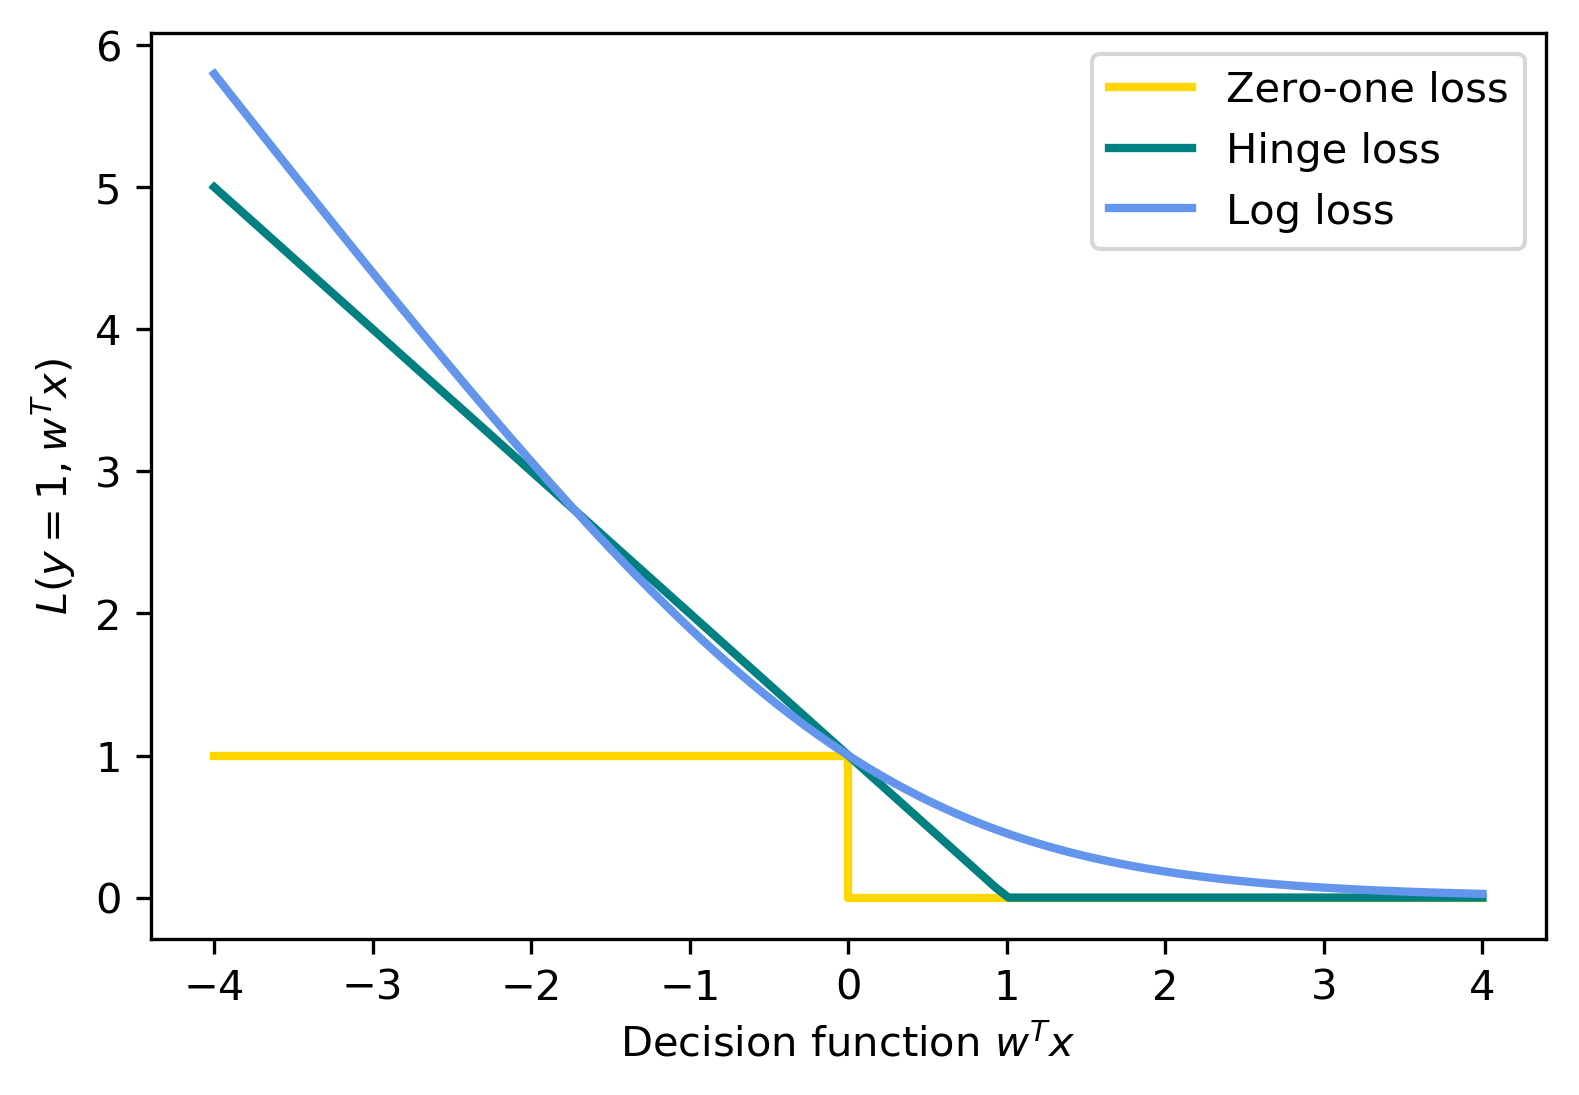

In [6]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")

plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
#plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
#         label="Squared hinge loss")

#plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $w^Tx$")
plt.ylabel("$L(y=1, w^Tx) $")
plt.savefig("binary_loss.png")

## Show the logit (sigmoid) function  

In [ ]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

line =  np.linspace(-5, 5, 100)   
ax.plot(line, 1. / (1 + np.exp(-line)))

### Show the effects of Regularization parameters c on Linear SVC
#####   using SVC instead of LinearSVC so we can get support vectors more easily

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(centers=2, random_state=4, n_samples=30)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# a carefully hand-designed dataset lol
y[7] = 0
y[27] = 0
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

for ax, C in zip(axes, [1e-1, 1, 1e2]):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)

    svm = SVC(kernel='linear', C=C, tol=0.00001).fit(X, y)
    # using SVC instead of LinearSVC so we can get support vectors more easily
    w = svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(6, 13)
    yy = a * xx - (svm.intercept_[0]) / w[1]
    ax.plot(xx, yy, c='k')
    
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("C = %.2f" % C)
axes[0].legend(loc="best")
plt.savefig("linear_svm_regularization.png")

# Multiclass

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(np.bincount(y))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y)
linearsvm = LinearSVC().fit(X, y)
print(logreg.coef_.shape)
print(linearsvm.coef_.shape)

In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_

In [ ]:
from sklearn.preprocessing import scale
logreg = LogisticRegression(fit_intercept=False, multi_class="multinomial", solver="lbfgs").fit(scale(X), y)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5))
for ax, coef, classname in zip(axes, logreg.coef_, iris.target_names):
    ax.barh(range(4), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(4))
axes[0].set_yticklabels(iris.feature_names)
plt.tight_layout()


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
ax = plt.gca()
ax.set_aspect("equal")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# OVR One vs Rest

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=100).fit(X, y)

## plot the decision boundaries

In [ ]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.gca().set_aspect("equal")
plt.xlim(xlim)
plt.ylim(ylim)
plt.savefig("ovr_lines.png")

In [ ]:
import matplotlib as mpl

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("ovr_boundaries.png")

# OVO

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=100).fit(X, y)
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
classes = [(0, 1), (0, 2), (1, 2)]
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("ovo_lines.png")

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=27)

svm = SVC(kernel="linear", C=100).fit(X, y)

points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.imshow(pred.reshape(xx.shape), cmap="Accent", alpha=.2, extent=(xlim[0], xlim[1], ylim[1], ylim[0]))
for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
    line2 = -(line * coef[1] + intercept) / coef[0]
    plt.plot(line2, line, "-", c=colors[col[0]])
    plt.plot(line2, line, "--", c=colors[col[1]])
plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal")
plt.savefig("ovo_boundaries.png")

## Linear models for classification on breast cancer dataset

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

In [ ]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)